### Palla Revanth
### 20MAI0046
### Question 01: Perform BackPropagation on DressSales dataset

In [1]:
import numpy as np
import pandas as pd 
import random 
import math
from numpy import dot,exp

In [5]:
df = pd.read_csv('S:/WInterSem/ML_Techniques/All_labs/FAT/dress.csv')
df.head()

,Dress_ID,29/8/2013,31/8/2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14/9/2013,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1190380701,6,7,7,7,8,8,9,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## data cleaning
df.isnull().sum()

Dress_ID         0
29/8/2013        0
31/8/2013        0
09-02-2013       0
09-04-2013       0
09-06-2013       0
09-08-2013       0
09-10-2013       0
09-12-2013       0
14/9/2013        0
16/9/2013        0
18/9/2013        0
20/9/2013        0
22/9/2013        0
24/9/2013        0
26/9/2013      237
28/9/2013        0
30/9/2013      273
10-02-2013     275
10-04-2013     274
10-06-2013       0
10-08-2010     271
10-10-2013     271
10-12-2013       0
Unnamed: 24    500
Unnamed: 25    500
Unnamed: 26    500
Unnamed: 27    500
Unnamed: 28    500
Unnamed: 29    500
Unnamed: 30    500
Unnamed: 31    500
Unnamed: 32    500
Unnamed: 33    500
Unnamed: 34    500
Unnamed: 35    500
dtype: int64

In [7]:
## remove those null columns
df=df.dropna(axis=1,how='all')

In [8]:
df.head()

,Dress_ID,29/8/2013,31/8/2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14/9/2013,...,24/9/2013,26/9/2013,28/9/2013,30/9/2013,10-02-2013,10-04-2013,10-06-2013,10-08-2010,10-10-2013,10-12-2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [34]:
X = df.iloc[:,1:3].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [39]:
## initial own weights
Network([2,2,1])

[array([[ 0.09762701,  0.43037873],
       [ 0.20552675,  0.08976637],
       [-0.1526904 ,  0.29178823]]), array([[-0.12482558],
       [ 0.783546  ],
       [ 0.92732552]])]


In [38]:
def Network( model_structure):
    global no_of_layers 
    global model 
    global W 
    
    np.random.seed(0)     
    no_of_layers = len(model_structure)
    
    model = model_structure
    W = [] 

    c = no_of_layers - 1

    for Layer in range(c):
        w = 2*np.random.rand(model[Layer] + 1, model[Layer+1]) -1
        W.append(w)
    print(W)

In [40]:
e=np.exp 

def tanh(x):
    return (1.0 - e(-2*x))/(1.0 + e(-2*x))

def dy_dxTanh(x):
    return (1 + tanh(x))*(1 - tanh(x))

In [41]:
def MultiLayerPerceptron( a,actual_value,alpha): 
        y = a
        d=len(W)-1
        for i in range(d):
            weighted_sum = np.dot(y[i], W[i]) 
            f_of_x = tanh(weighted_sum) 
            f_of_x = np.concatenate((np.ones(1), np.array(f_of_x)))
            y.append(f_of_x)
        
        weighted_sum = np.dot(y[-1], W[-1]) 
        f_of_x = tanh(weighted_sum)    
        y.append(f_of_x)
    
        error = actual_value - y[-1]      
        change = [error * dy_dxTanh(y[-1])] 

        for i in range(no_of_layers-2, 0, -1):
            error = change[-1].dot(W[i][1:].T) 
            error = error*dy_dxTanh(y[i][1:])
            change.append(error)
        change.reverse()
        
        for i in range(len(W)):
            Layer = y[i].reshape(1, model[i]+1)
            delta = change[i].reshape(1, model[i+1])
            W[i] = W[i]+ alpha*Layer.T.dot(delta)

In [42]:
def fit( data, target_labels, alpha, epochs=100):
        ans = np.ones((1, data.shape[0]))
        Zita = np.concatenate((ans.T, data), axis=1)
        
        for m in range(epochs):
            example = np.random.randint(X.shape[0])
            x = [Zita[example]]  
            actual_value = target_labels[example]
            y = MultiLayerPerceptron(x,actual_value,alpha)

In [43]:
def predict_1( x):  
    val = np.concatenate((np.ones(1).T, np.array(x)))
    for i in range(0, len(W)):
        val = tanh(np.dot(val, W[i]))
        val = np.concatenate((np.ones(1).T, np.array(val)))
    return val[1]
    
def predict( X):
    value = np.array([]).reshape(0, model[-1])
    for p in X:  
        y_pred = np.array([[predict_1(p)]]) 
        value = np.vstack((value,y_pred))
    return value

In [44]:
learning_rate=0.1  
fit(X, y,learning_rate, epochs=10)

In [45]:
## Final weights
print(W)

[array([[  3222.33590562,   3779.86501059],
       [506458.35181651, 613132.50267589],
       [578571.89115305, 701458.97205141]]), array([[167.3381997 ],
       [140.21345833],
       [149.93221838]])]


In [46]:
print("Final prediction")
print("[X1 X2]\tY_Actual\tY_Pred")
l=[]
i=0
for s in X:
    p = predict_1(s)
    if p >0.5:
        l.append(1)
    else:
        l.append(0)
    print(s," ",l[i]," ","[",p,"]")
    i=i+1

Final prediction
[X1 X2]	Y_Actual	Y_Pred
[2114 2274]   1   [ 1.0 ]
[151 275]   1   [ 1.0 ]
[6 7]   1   [ 1.0 ]
[1005 1128]   1   [ 1.0 ]
[ 996 1175]   1   [ 1.0 ]
[4 5]   1   [ 1.0 ]
[45 61]   1   [ 1.0 ]
[ 4 13]   1   [ 1.0 ]
[5 6]   1   [ 1.0 ]
[ 9 11]   1   [ 1.0 ]
[15 28]   1   [ 1.0 ]
[23 38]   1   [ 1.0 ]
[1235 1333]   1   [ 1.0 ]
[2498 2545]   1   [ 1.0 ]
[22 28]   1   [ 1.0 ]
[4 8]   1   [ 1.0 ]
[1587 1669]   1   [ 1.0 ]
[10 13]   1   [ 1.0 ]
[2 4]   1   [ 1.0 ]
[122 143]   1   [ 1.0 ]
[104 106]   1   [ 1.0 ]
[856 967]   1   [ 1.0 ]
[145 189]   1   [ 1.0 ]
[1292 1319]   1   [ 1.0 ]
[2 3]   1   [ 1.0 ]
[6 7]   1   [ 1.0 ]
[ 986 1048]   1   [ 1.0 ]
[6 8]   1   [ 1.0 ]
[375 421]   1   [ 1.0 ]
[7455 7467]   1   [ 1.0 ]
[1168 1271]   1   [ 1.0 ]
[ 84 130]   1   [ 1.0 ]
[804 837]   1   [ 1.0 ]
[911 946]   1   [ 1.0 ]
[2184 2228]   1   [ 1.0 ]
[1134 1482]   1   [ 1.0 ]
[1576 1680]   1   [ 1.0 ]
[19 23]   1   [ 1.0 ]
[175 189]   1   [ 1.0 ]
[216 261]   1   [ 1.0 ]
[48 55]   1   [ 1.0 ]

### Question 02: Barchart

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('S:/WInterSem/ML_Techniques/All_labs/FAT/Attribute.csv')
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [49]:
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [52]:
## remove those null columns
df=df.dropna(axis=1)

In [53]:
df.head()

,Dress_ID,Style,Rating,Size,Recommendation
0,1006032852,Sexy,4.6,M,1
1,1212192089,Casual,0.0,L,0
2,1190380701,vintage,0.0,L,0
3,966005983,Brief,4.6,L,1
4,876339541,cute,4.5,M,0


In [54]:
df.shape

(500, 5)

In [85]:
x = df.columns.tolist()

In [86]:
x

['Dress_ID', 'Style', 'Rating', 'Size', 'Recommendation']

In [87]:
## remove dress ID
x.pop(0)
x.pop()
print(x)

['Style', 'Rating', 'Size']


In [88]:
y_style = df['Style'].value_counts()
y_rating = df['Rating'].value_counts()
y_size = df['Size'].value_counts()
#y_recomm = df['Recommendation'].value_counts()

## calculate mean of these values
y_style_mean = np.mean(y_style)
y_rating_mean = np.mean(y_rating)
y_size_mean = np.mean(y_size)
#y_recomm_mean = np.mean(y_recomm)

y = [y_style_mean, y_rating_mean, y_size_mean]

[0 1 2]


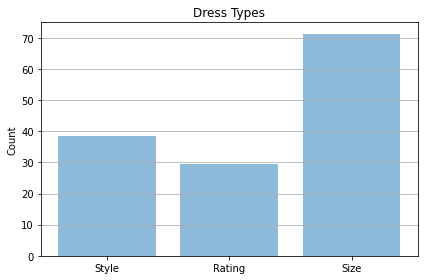

In [89]:
x_pos = np.arange(len(x))
print(x_pos)
fig, ax = plt.subplots()
ax.bar(x_pos, y , align='center', alpha=0.5)
ax.set_ylabel('Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_title('Dress Types')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()